### **Cross Validation Analysis**

In [1]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path(os.getcwd()).resolve().parent

sys.path.append(str(project_root))

from src.utils import read_processed_data, config_loader, get_logger


log = get_logger()
config = config_loader()
path_svc = os.path.join(project_root, config['cv_result'], 'svc_results.csv')
path_knn = os.path.join(project_root, config['cv_result'], 'knn_results.csv')
path_rf = os.path.join(project_root, config['cv_result'], 'rf_results.csv')
path_xgb = os.path.join(project_root, config['cv_result'], 'xgb_results.csv')

cv_result = read_processed_data(path=path_svc, log=log)
cv_result = cv_result.sort_values(by='param_C')

2025-07-05 02:12:20.167 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/svc_results.csv


In [2]:
# Display basic information about the cv_result DataFrame
print("Shape of cv_result:", cv_result.shape)
print("\nFirst 5 rows:")
print(cv_result.head())

print("\nSummary statistics:")
print(cv_result.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(cv_result.isnull().sum())

Shape of cv_result: (10, 49)

First 5 rows:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
7     208.056156    169.312356         9.099668        2.968619          rbf   
5     197.984245    165.625894        10.720768        4.960474          rbf   
6     157.590747    130.986843         8.519346        3.916556          rbf   
0     236.813804    216.231848        10.629411        5.048656          rbf   
9      11.122279      7.826491         2.289620        0.962507          rbf   

            param_gamma param_class_weight   param_C  \
7                   1.0           balanced  0.027826   
5                  auto           balanced  0.077426   
6  0.025118864315095822                NaN  0.077426   
0                  auto           balanced  0.599484   
9                0.0001                NaN  1.668101   

                                              params  split0_test_accuracy  \
7  {'kernel': 'rbf', 'gamma': 1.0, 'class_weight'...        

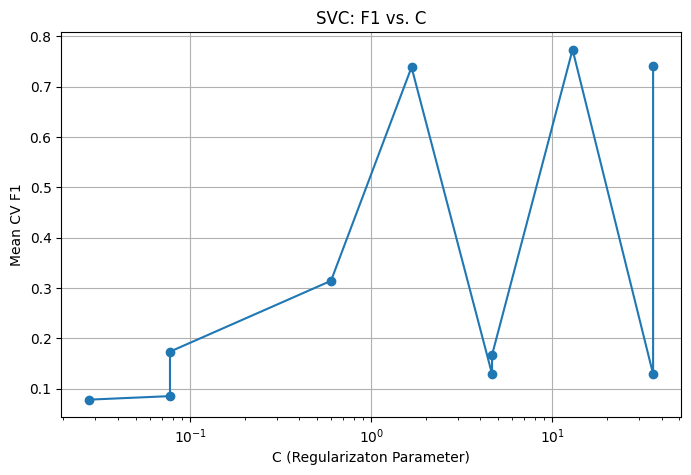

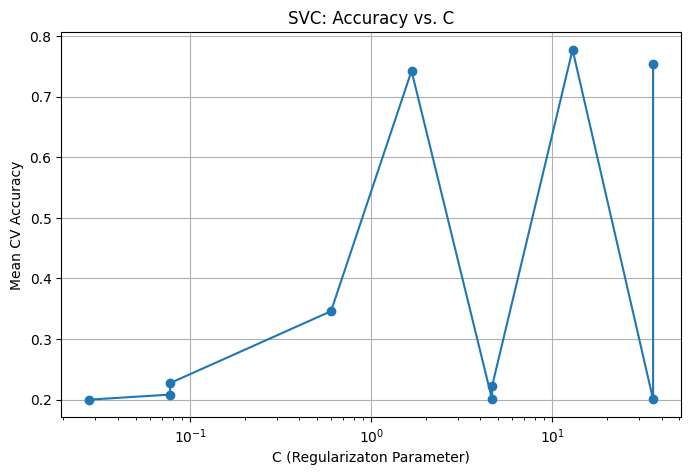

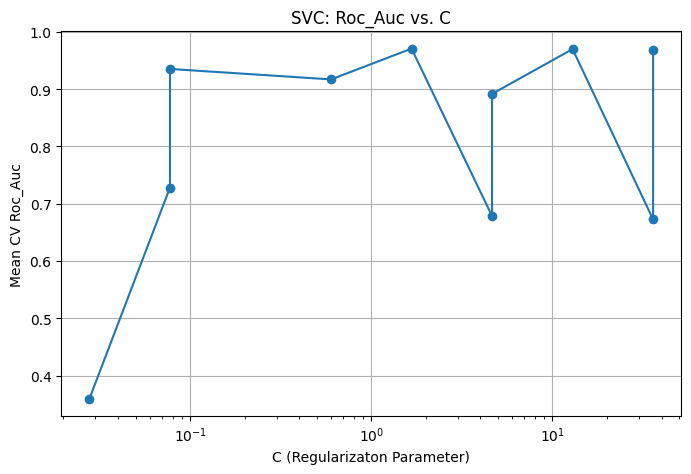

In [3]:
parameter = ['mean_test_f1', 'mean_test_accuracy', 'mean_test_roc_auc']

for param in parameter:
        
    plt.figure(figsize=(8, 5))
    plt.plot(cv_result['param_C'], cv_result[param], marker='o')
    plt.xscale('log')
    plt.xlabel('C (Regularizaton Parameter)')
    plt.title(f'SVC: {param.replace("mean_test_", "").title()} vs. C')
    plt.ylabel(f'Mean CV {param.replace("mean_test_", "").title()}')
    plt.grid(True)
    plt.savefig(f'svc_{param.replace("mean_test_", "").title()}_vs_C.png', dpi=500)
    plt.show()

2025-07-05 02:12:22.496 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/knn_results.csv


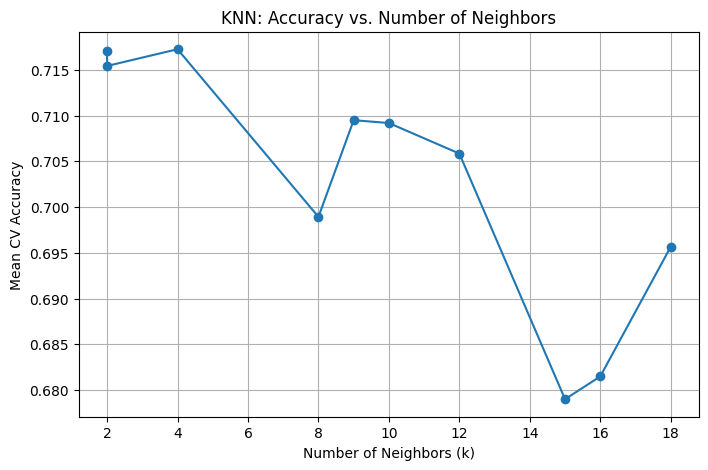

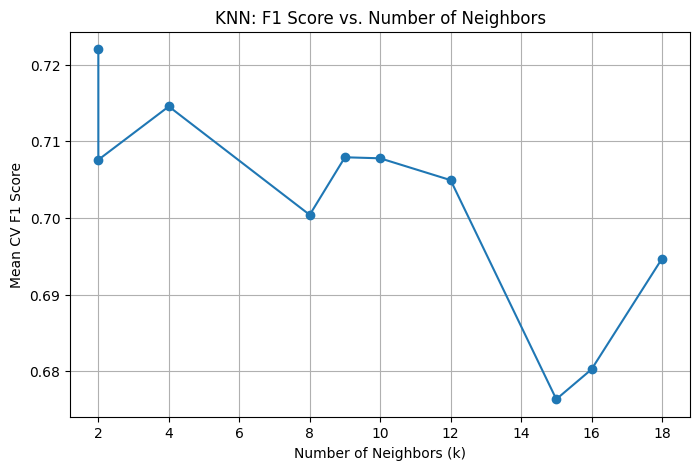

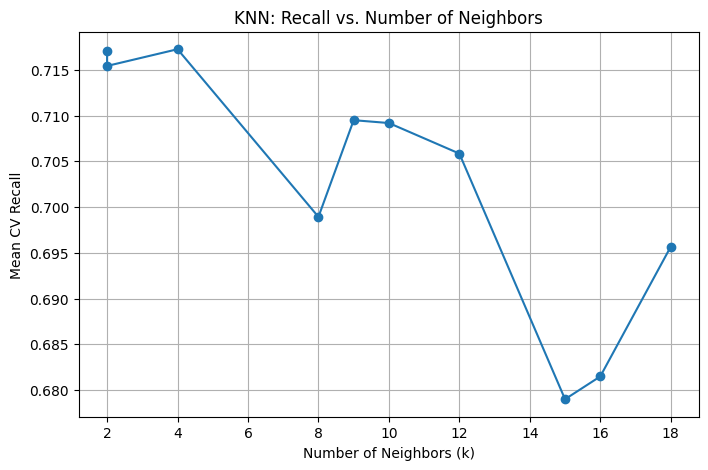

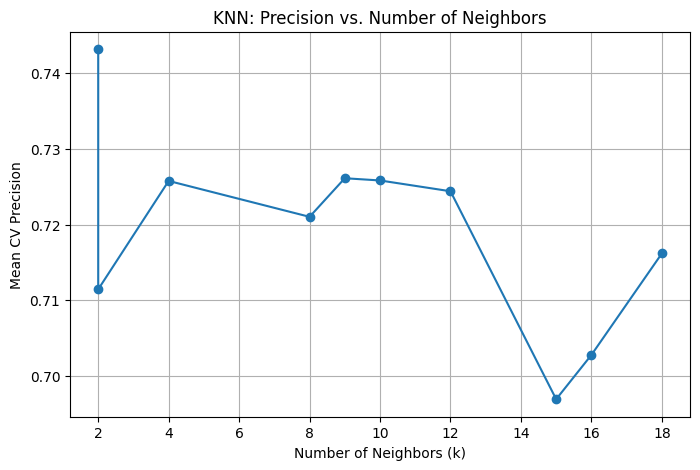

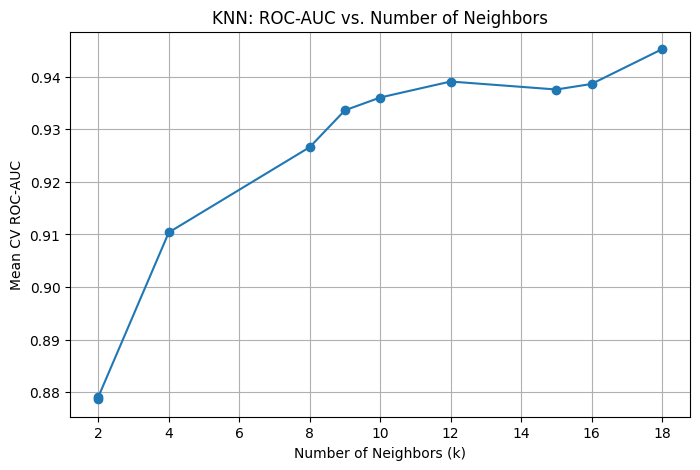

In [4]:
#  KNN Plot..
cv_result_knn = read_processed_data(path=path_knn, log=log)
cv_result_knn = cv_result_knn.sort_values(by="param_n_neighbors")

metrics = [
    ('mean_test_accuracy', 'Accuracy'),
    ('mean_test_f1', 'F1 Score'),
    ('mean_test_recall', 'Recall'),
    ('mean_test_precision', 'Precision'),
    ('mean_test_roc_auc', 'ROC-AUC')
]

for metric, label in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(cv_result_knn['param_n_neighbors'], cv_result_knn[metric], marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel(f'Mean CV {label}')
    plt.title(f'KNN: {label} vs. Number of Neighbors')
    plt.grid(True)
    plt.savefig(f'knn_{metric}_vs_k.png', dpi=500)
    plt.show()


2025-07-05 02:12:25.404 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/xgb_results.csv


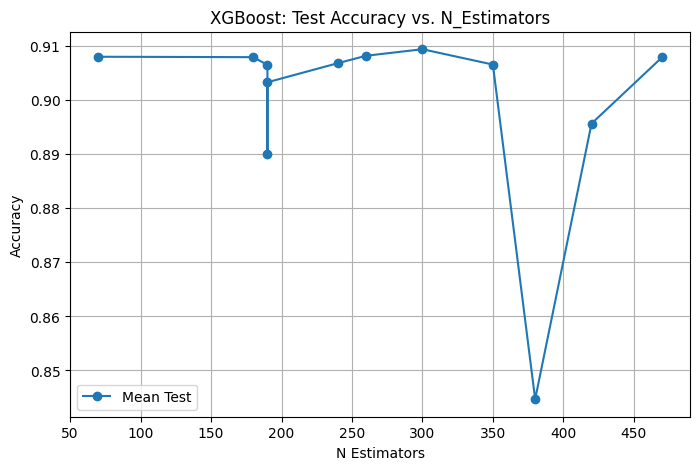

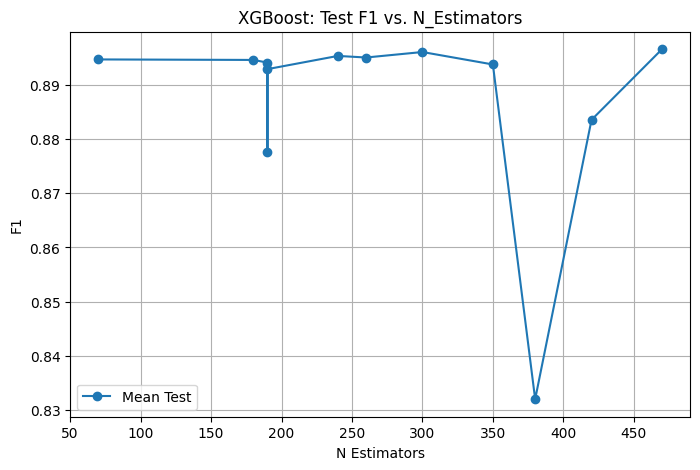

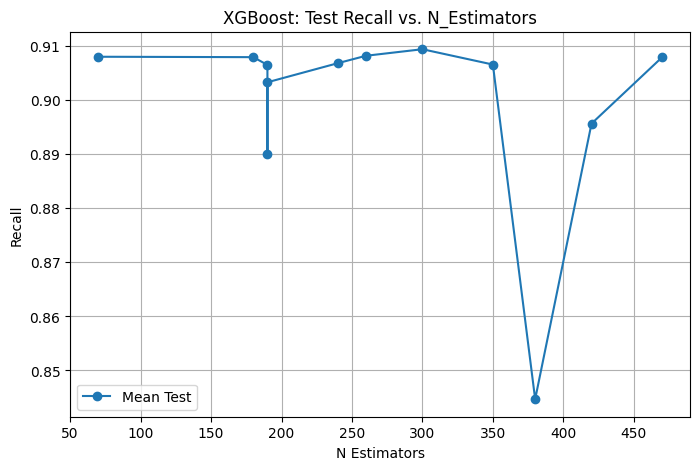

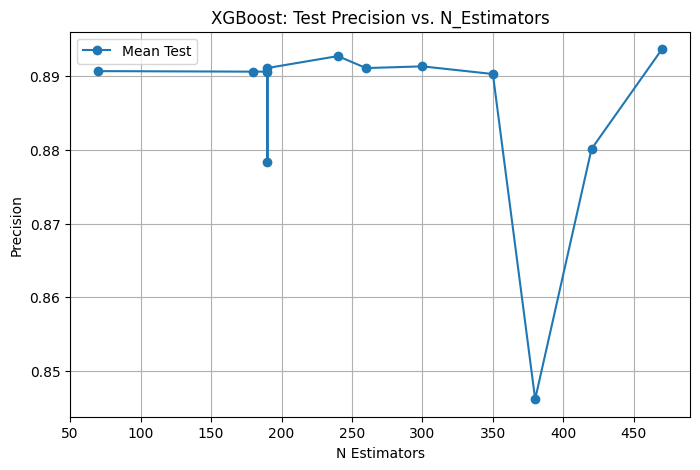

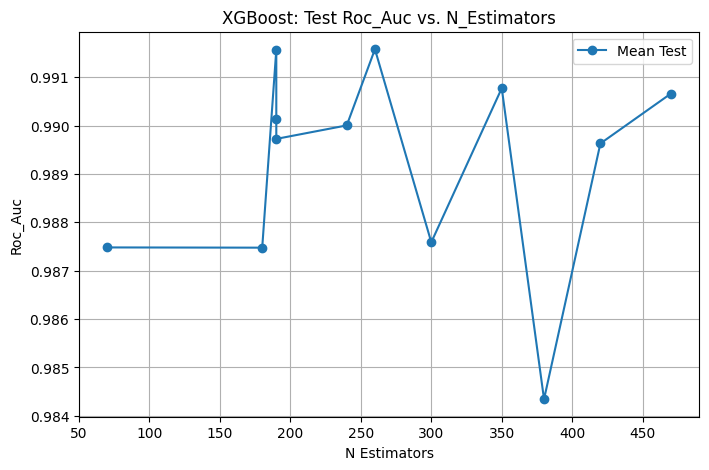

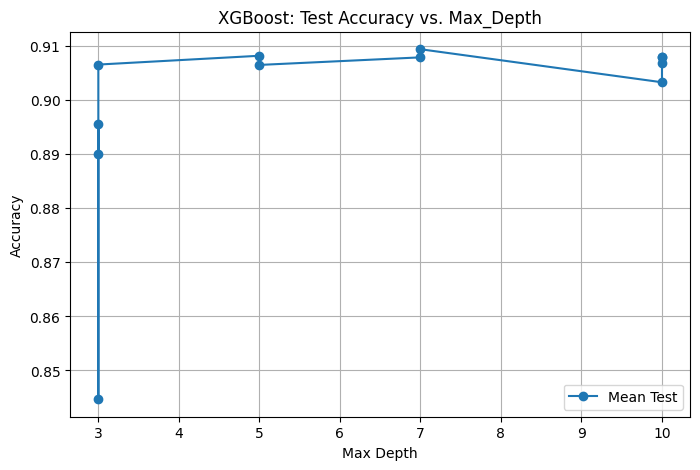

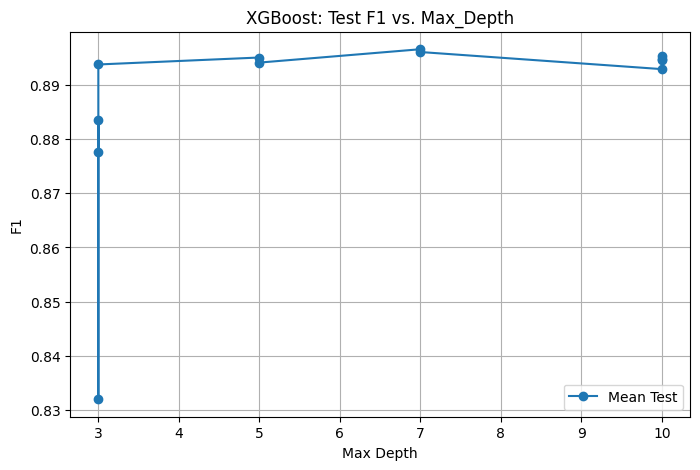

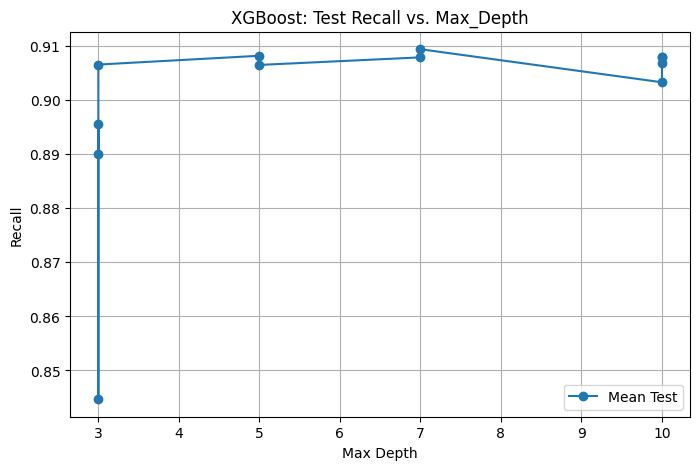

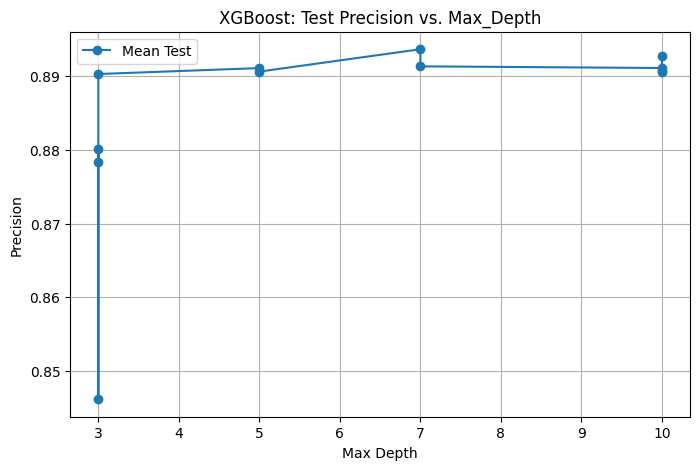

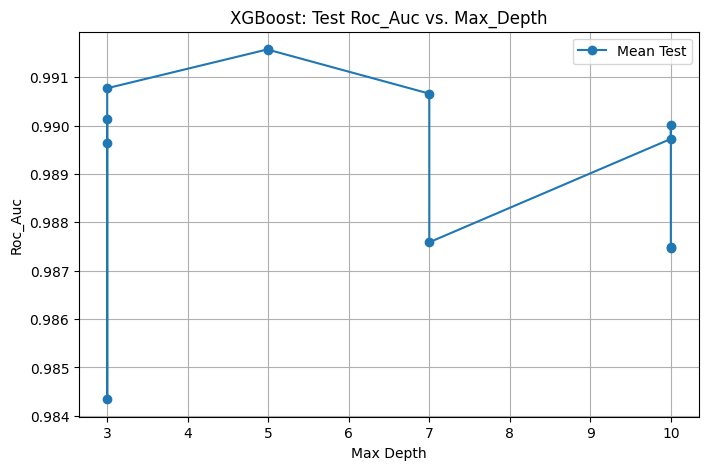

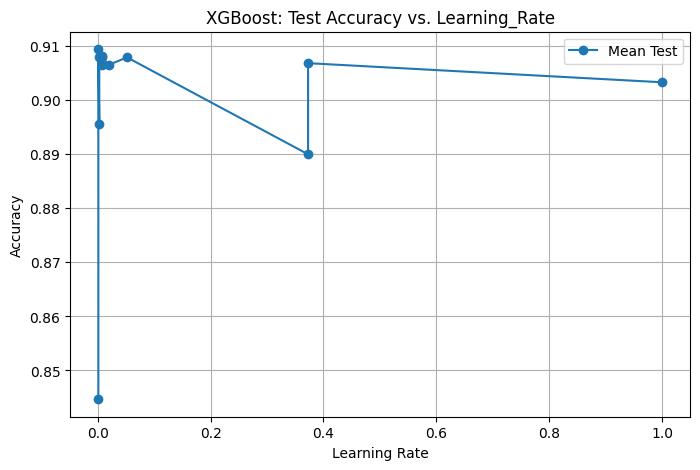

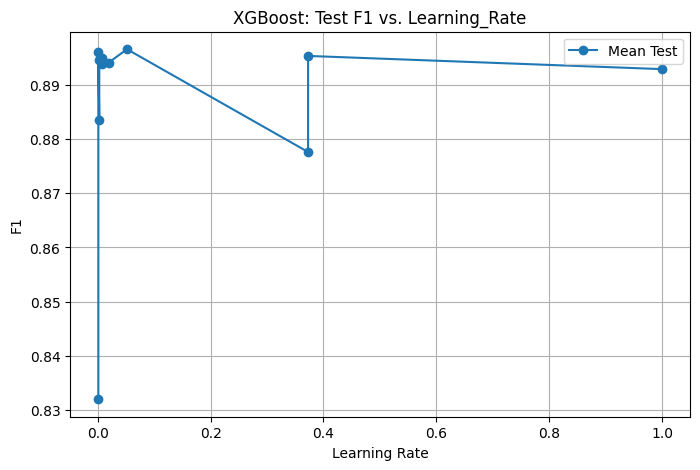

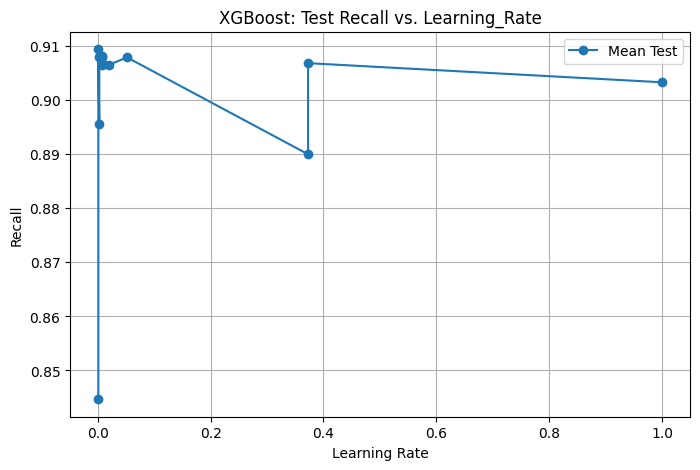

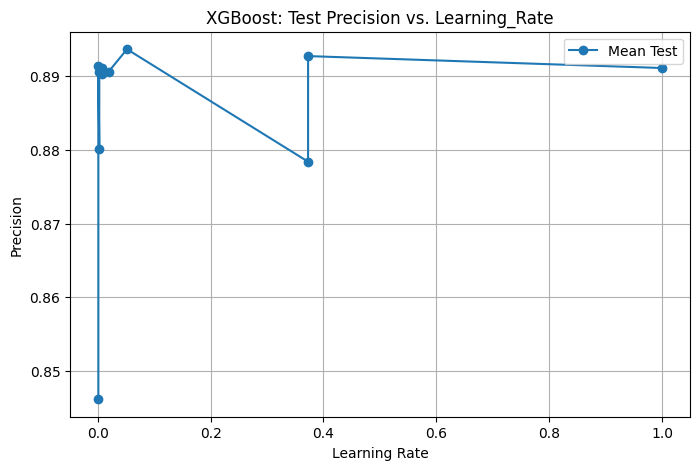

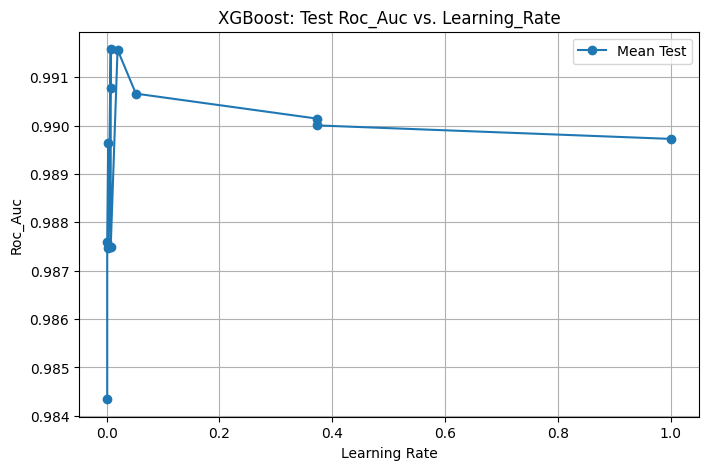

In [5]:
# XGBoost Plot..
cv_result_xgb = read_processed_data(path=path_xgb, log=log)

metrics = [
    ('accuracy', 'mean_test_accuracy'),
    ('f1', 'mean_test_f1'),
    ('recall', 'mean_test_recall'),
    ('precision', 'mean_test_precision'),
    ('roc_auc', 'mean_test_roc_auc')
]

params = ['param_n_estimators', 'param_max_depth', 'param_learning_rate']  
for x_param in params:
    cv_result_xgb = cv_result_xgb.sort_values(by=x_param)
    for label, test_metric in metrics:
        plt.figure(figsize=(8, 5))
        plt.plot(cv_result_xgb[x_param], cv_result_xgb[test_metric], marker='o', label='Mean Test')
        plt.xlabel(x_param.replace('param_', '').replace('_', ' ').title())
        plt.ylabel(label.title())
        plt.title(f'XGBoost: Test {label.title()} vs. {x_param.replace("param_", "").title()}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'xgb_{label}_train_test_vs_{x_param}.png', dpi=500)
        plt.show()



2025-07-05 02:12:33.788 | INFO     | src.utils:read_processed_data:56 - Data read successfully from /home/runner/work/aqi-healthy-air/aqi-healthy-air/cv_results/rf_results.csv


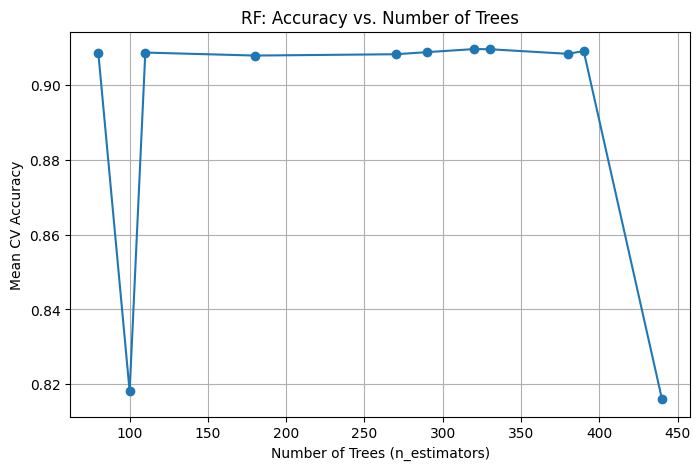

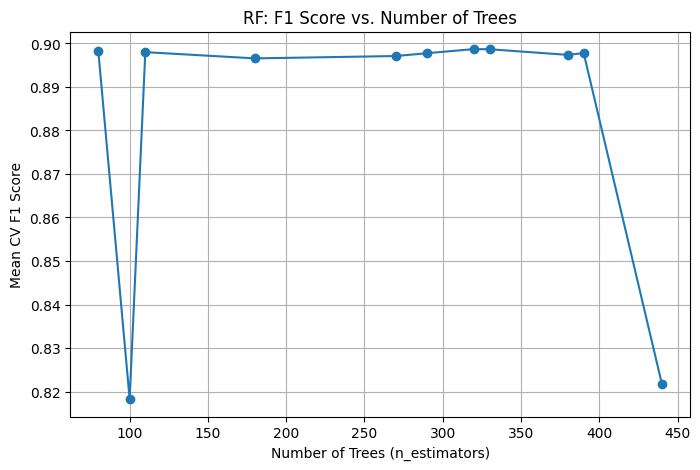

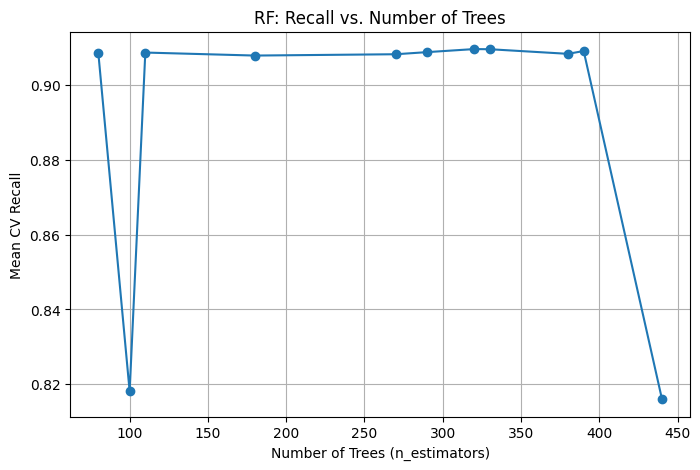

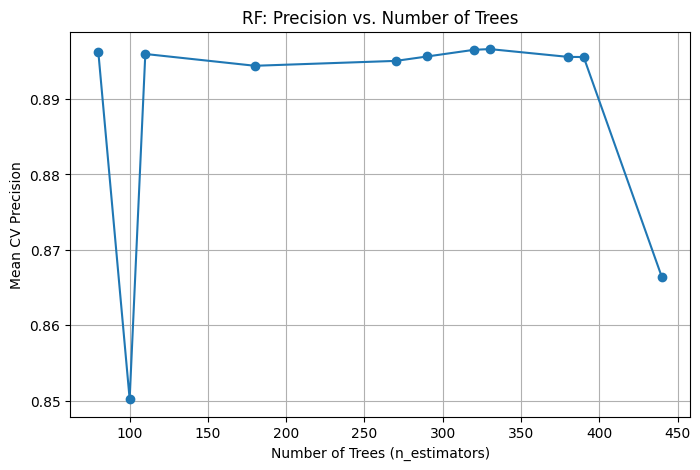

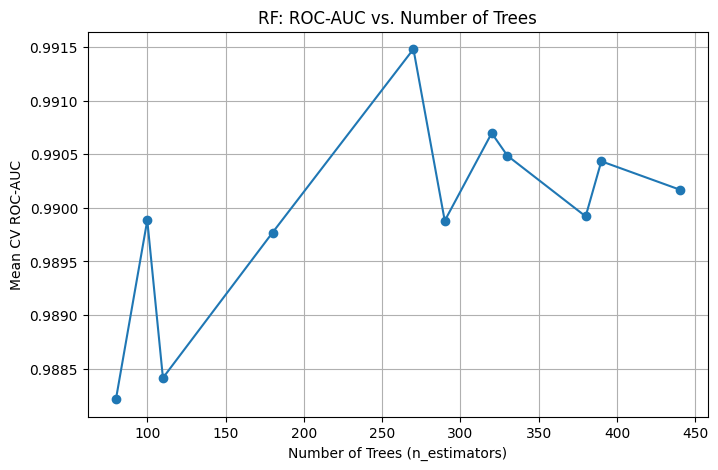

In [6]:
# Random Forest Plot..
cv_result_rf = read_processed_data(path=path_rf, log=log)
cv_result_rf = cv_result_rf.sort_values(by='param_n_estimators')

metrics = [
    ('mean_test_accuracy', 'Accuracy'),
    ('mean_test_f1', 'F1 Score'),
    ('mean_test_recall', 'Recall'),
    ('mean_test_precision', 'Precision'),
    ('mean_test_roc_auc', 'ROC-AUC')
]

for metric, label in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(cv_result_rf['param_n_estimators'], cv_result_rf[metric], marker='o')
    plt.xlabel('Number of Trees (n_estimators)')
    plt.ylabel(f'Mean CV {label}')
    plt.title(f'RF: {label} vs. Number of Trees')
    plt.grid(True)
    plt.savefig(f'rf_{metric}_vs_estimators.png', dpi=500)
    plt.show()